# Introduction

This notebook aims to perform EDA and statistical analysis of the financial data of stock market. For this experiment IBM stock has been selected.

## EDA

In [1]:
# Import Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

%matplotlib inline

# Ignore Warnings
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Read CSV file
ibm_monthly_data = pd.read_csv("/Users/xs211-soudas/Python/Real-time-stock-prediction/real-time-stock-prediction/data_loader_realtime_lambda/data/sample_data/monthly_IBM.csv")
print(ibm_monthly_data.head())

    timestamp    open      high     low   close     volume
0  2023-10-13  140.04  143.4150  138.27  138.46   32319252
1  2023-09-29  147.26  151.9299  139.61  140.30   82806487
2  2023-08-31  144.25  147.7275  139.76  146.83   84274205
3  2023-07-31  133.42  144.6050  131.55  144.18   85778938
4  2023-06-30  128.44  139.4690  127.78  133.81  100722016


In [3]:
# Basic Information for the dataset
print("===================== Basic Information =================")
print(ibm_monthly_data.info())
print("======================================================")

# Check for missing values
print("===================== Missing Values =================")
print(ibm_monthly_data.isnull().sum())
print("======================================================")


===================== Basic Information =================
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287 entries, 0 to 286
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  287 non-null    object 
 1   open       287 non-null    float64
 2   high       287 non-null    float64
 3   low        287 non-null    float64
 4   close      287 non-null    float64
 5   volume     287 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 13.6+ KB
None
===================== Missing Values =================
timestamp    0
open         0
high         0
low          0
close        0
volume       0
dtype: int64


In [4]:
# Summary Statistics of the dataset
print("===================== Summary Statistics =================")
print(ibm_monthly_data.describe(include='all'))
print("======================================================")

===================== Summary Statistics =================
         timestamp        open        high         low       close  \
count          287  287.000000  287.000000  287.000000  287.000000   
unique         287         NaN         NaN         NaN         NaN   
top     2023-10-13         NaN         NaN         NaN         NaN   
freq             1         NaN         NaN         NaN         NaN   
mean           NaN  129.683171  136.011251  123.248484  129.650139   
std            NaN   35.659636   35.865221   34.832941   35.536492   
min            NaN   59.200000   74.200000   54.010000   58.310000   
25%            NaN   99.225000  107.645000   93.190500   99.565000   
50%            NaN  127.290000  134.250000  120.700000  127.160000   
75%            NaN  153.170000  158.640000  145.010000  153.365000   
max            NaN  212.800000  215.900000  199.360000  213.300000   

              volume  
count   2.870000e+02  
unique           NaN  
top              NaN  
freq    

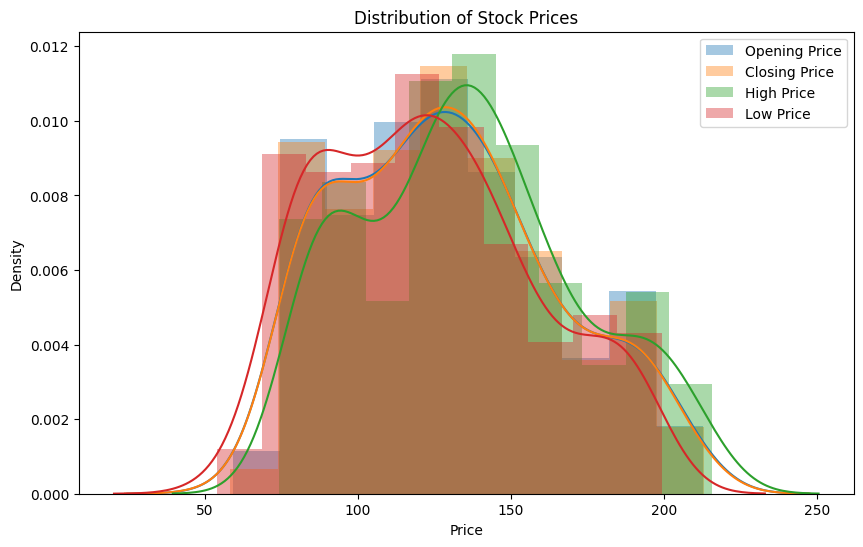

In [5]:
# Plotting distribution for Open, Closed, High and Low values of the stock data

open_data = ibm_monthly_data['open']
close_data = ibm_monthly_data['close']
high_data = ibm_monthly_data['high']
low_data = ibm_monthly_data['low']

# Plotting using Seaborn and Matplotlib
plt.figure(figsize=(10, 6))

# Plot for 'open' column
sns.distplot(open_data, bins=10, hist=True, kde=True, label='Opening Price')

# Plot for 'close' column
sns.distplot(close_data, bins=10, hist=True, kde=True, label='Closing Price')

# Plot for 'high' column
sns.distplot(high_data, bins=10, hist=True, kde=True, label='High Price')

# Plot for 'low' column
sns.distplot(low_data, bins=10, hist=True, kde=True, label='Low Price')

# Adding labels and title
plt.xlabel('Price')
plt.ylabel('Density')
plt.title('Distribution of Stock Prices')
plt.legend()  # Add legend based on the 'label' parameter in the distplot functions

# Show plot
plt.show()


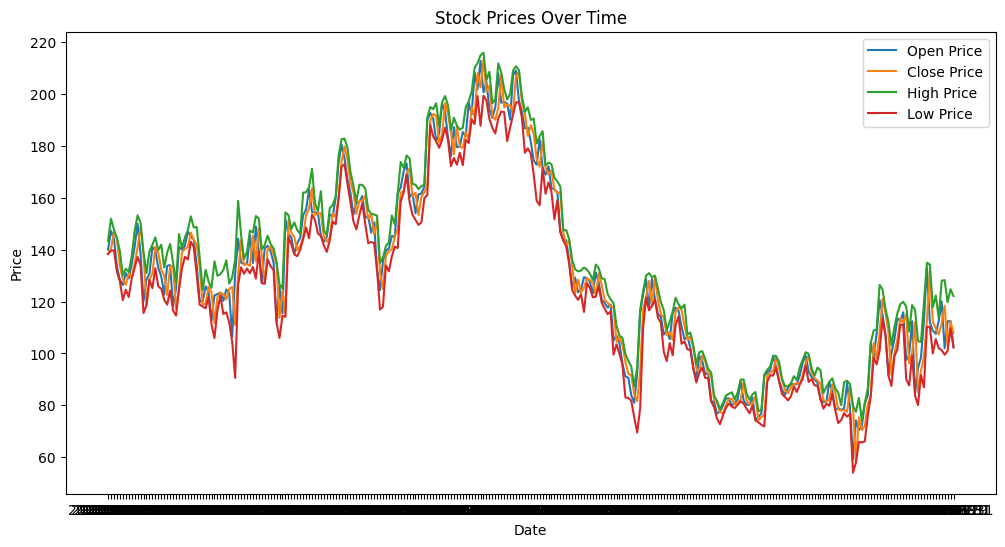

In [6]:
plt.figure(figsize=(12, 6))

plt.plot(ibm_monthly_data['timestamp'], open_data, label='Open Price')
plt.plot(ibm_monthly_data['timestamp'], close_data, label='Close Price')
plt.plot(ibm_monthly_data['timestamp'], high_data, label='High Price')
plt.plot(ibm_monthly_data['timestamp'], low_data, label='Low Price')

plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Prices Over Time')
plt.legend()
plt.show()

In [7]:
fig = go.Figure(data=[go.Candlestick(x=ibm_monthly_data['timestamp'],
                open=open_data,
                high=high_data,
                low=low_data,
                close=close_data)])

fig.update_xaxes(type='category')
fig.update_layout(title='IBM Stock Prices (Candlestick Chart)',
                  xaxis_title='Date',
                  yaxis_title='Price')
fig.show()

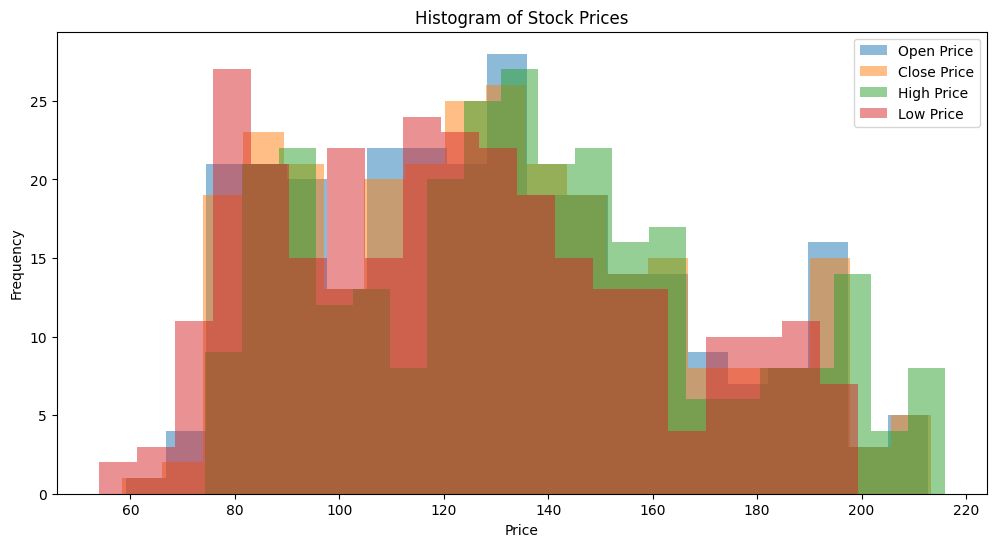

In [8]:
plt.figure(figsize=(12, 6))

plt.hist(open_data, bins=20, alpha=0.5, label='Open Price')
plt.hist(close_data, bins=20, alpha=0.5, label='Close Price')
plt.hist(high_data, bins=20, alpha=0.5, label='High Price')
plt.hist(low_data, bins=20, alpha=0.5, label='Low Price')

plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Histogram of Stock Prices')
plt.legend()
plt.show()


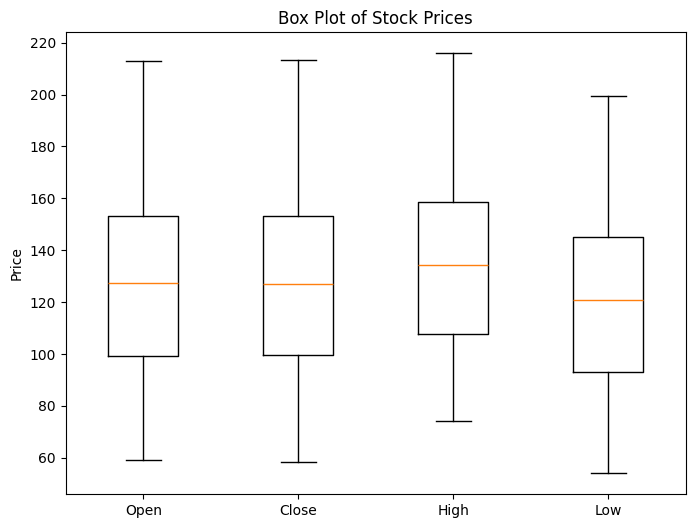

In [9]:
plt.figure(figsize=(8, 6))

plt.boxplot([open_data, close_data, high_data, low_data], labels=['Open', 'Close', 'High', 'Low'])
plt.ylabel('Price')
plt.title('Box Plot of Stock Prices')
plt.show()

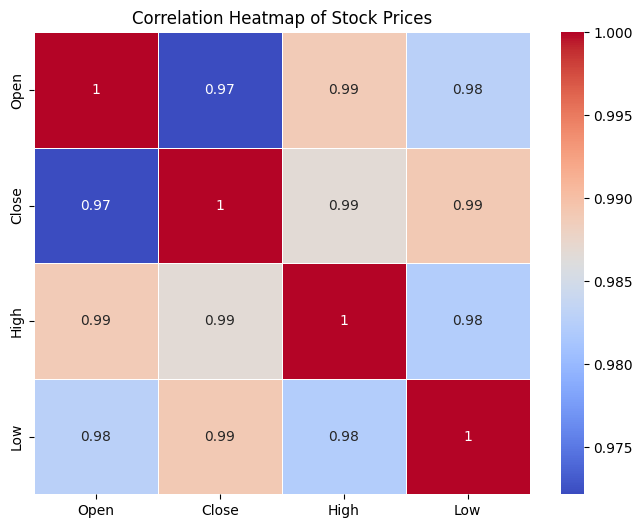

In [10]:
# Create a DataFrame with the data
data = pd.DataFrame({'Open': open_data, 'Close': close_data, 'High': high_data, 'Low': low_data})

# Calculate the correlation matrix
correlation_matrix = data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap of Stock Prices')
plt.show()

### Volatility Analysis:

Calculate daily, monthly, or annual volatility to assess risk.
Plot volatility over time to identify periods of high and low volatility.

ibm_daily_data['close'] represents the closing prices of IBM stock on a daily basis. We calculate daily returns using the pct_change() method. Then, we compute the rolling standard deviation of daily returns over a specified window (rolling_window), which is 5 days in this case, to represent a month's worth of trading days. The standard deviation is annualized by multiplying it by the square root of the number of trading days in a year (usually 252).

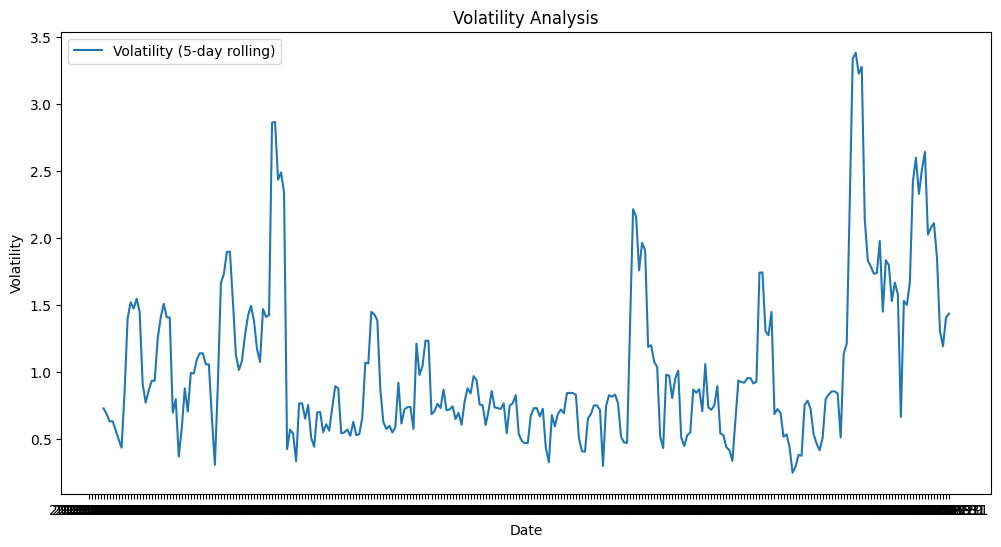

In [11]:
# ibm_daily_data contains the daily stock price data, and 'date' is a column in the DataFrame
# Calculate daily returns
ibm_monthly_data['daily_returns'] = ibm_monthly_data['close'].pct_change()

# Calculate rolling standard deviation for a specific window (e.g., 20 days for a month)
rolling_window = 5
ibm_monthly_data['volatility'] = ibm_monthly_data['daily_returns'].rolling(window=rolling_window).std() * (252 ** 0.5)  # Annualized volatility

# Plot volatility over time
plt.figure(figsize=(12, 6))
plt.plot(
    ibm_monthly_data['timestamp'],
    ibm_monthly_data['volatility'],
    label=f'Volatility ({rolling_window}-day rolling)',
)
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Volatility Analysis')
plt.legend()
plt.show()

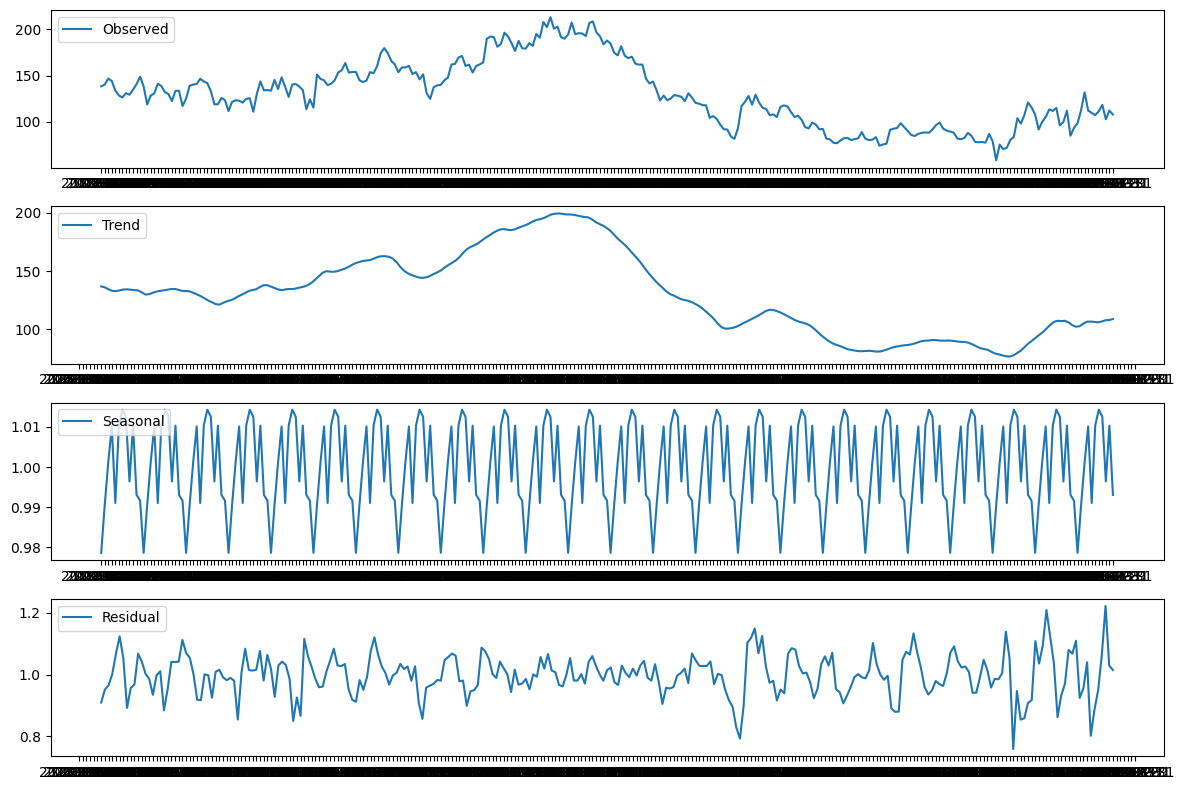

In [13]:
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Assuming ibm_monthly_data contains the monthly stock price data, and 'date' is a column in the DataFrame
# Set 'date' as the index of the DataFrame if it's not already set
ibm_monthly_data.set_index('timestamp', inplace=True)

# Perform seasonal decomposition
result = seasonal_decompose(ibm_monthly_data['close'], model='multiplicative', period=12)  # Assuming a yearly seasonal pattern

# Plot the decomposition components
plt.figure(figsize=(12, 8))
plt.subplot(4, 1, 1)
plt.plot(result.observed, label='Observed')
plt.legend(loc='upper left')

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()


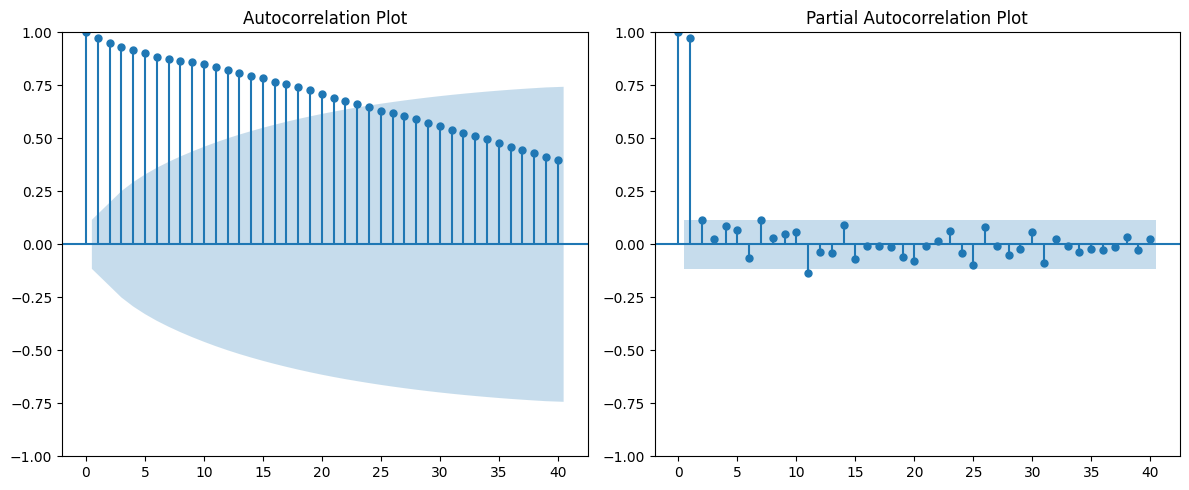

In [14]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot autocorrelation and partial autocorrelation plots
plt.figure(figsize=(12, 5))

# Autocorrelation plot
plt.subplot(1, 2, 1)
plot_acf(ibm_monthly_data['close'], lags=40, ax=plt.gca())
plt.title('Autocorrelation Plot')

# Partial autocorrelation plot
plt.subplot(1, 2, 2)
plot_pacf(ibm_monthly_data['close'], lags=40, ax=plt.gca())
plt.title('Partial Autocorrelation Plot')

plt.tight_layout()
plt.show()


In [15]:
import numpy as np

# Calculate Z-Scores for close, open, high, and low columns
for column in ['close', 'open', 'high', 'low']:
    mean_value = ibm_monthly_data[column].mean()
    std_value = ibm_monthly_data[column].std()
    ibm_monthly_data[f'{column}_z_score'] = np.abs((ibm_monthly_data[column] - mean_value) / std_value)

# Set Z-Score threshold
z_score_threshold = 2

# Outliers detected using Z-Score method
outliers_zscore = ibm_monthly_data[ibm_monthly_data[['close_z_score', 'open_z_score', 'high_z_score', 'low_z_score']].max(axis=1) > z_score_threshold]
print("Outliers detected using Z-Score method:")
print(outliers_zscore)

# Calculate lower and upper bounds for close, open, high, and low columns using IQR
for column in ['close', 'open', 'high', 'low']:
    Q1 = ibm_monthly_data[column].quantile(0.25)
    Q3 = ibm_monthly_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    ibm_monthly_data[f'{column}_outliers'] = (ibm_monthly_data[column] < lower_bound) | (ibm_monthly_data[column] > upper_bound)

# Outliers detected using IQR method
outliers_iqr = ibm_monthly_data[['close_outliers', 'open_outliers', 'high_outliers', 'low_outliers']].any(axis=1)
print("Outliers detected using IQR method:")
print(ibm_monthly_data[outliers_iqr])


Outliers detected using Z-Score method:
              open     high      low   close     volume  daily_returns  \
timestamp                                                                
2013-06-28  208.25  210.050  188.410  191.11   80215000      -0.020150   
2013-05-31  201.87  211.980  199.200  208.02   90683600       0.088483   
2013-04-30  212.80  214.890  187.680  202.54  108666600      -0.026344   
2013-03-28  200.65  215.900  199.360  213.30   76023800       0.053125   
2013-02-28  204.65  205.350  197.510  200.83   64144100      -0.058462   
2013-01-31  194.09  208.580  190.390  203.07   87636600       0.011154   
2012-10-31  208.01  211.790  190.560  194.53   96155000       0.023465   
2012-09-28  196.61  208.320  193.250  207.45   77341400       0.066416   
2012-08-31  196.96  202.000  193.020  194.85   60653700      -0.060738   
2012-05-31  207.18  208.929  192.000  192.90   86005300      -0.013703   
2012-04-30  208.96  210.690  196.791  207.08   86603000       0.073510  